## Nama : Muhammad Fajrianur
## NIM    : 2009106040
## Kelas : Informatika A 2020
# POSTTEST 6

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
import seaborn as sns

In [2]:
df = pd.read_csv("songs_normalize.csv")

In [3]:
df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


## Alogaritam K-mean Clustering

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=3)

In [7]:
points = df[['energy', 'acousticness']]

In [8]:
model.fit(points)

KMeans(n_clusters=3)

In [9]:
cluster_array = model.labels_

In [10]:
print(cluster_array)

[0 0 2 ... 2 1 0]


## Membuat Grafik Visualisasi

In [11]:
X = points['energy']
Y = points['acousticness']

In [12]:
cr = model.cluster_centers_

In [13]:
cr

array([[0.839739  , 0.06041937],
       [0.55913008, 0.50963415],
       [0.61465119, 0.09565052]])

In [15]:
cr_X = cr[:,0]
cr_Y = cr[:,1]

In [17]:
crt_X = pd.DataFrame(cr_X)
crt_X.head()

,0
0,0.839739
1,0.559130
2,0.614651


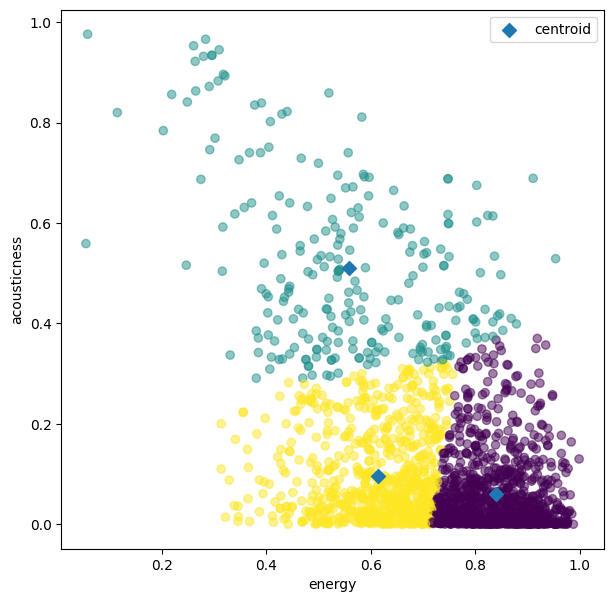

In [23]:
plt.figure(figsize=(7,7))
plt.scatter(X, Y, alpha=0.5, c=cluster_array)
plt.scatter(cr_X, cr_Y, marker='D', s=50, label='centroid')
plt.xlabel("energy")
plt.ylabel('acousticness')
plt.legend()
plt.show()

## Memakai Metode Elbow

In [24]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

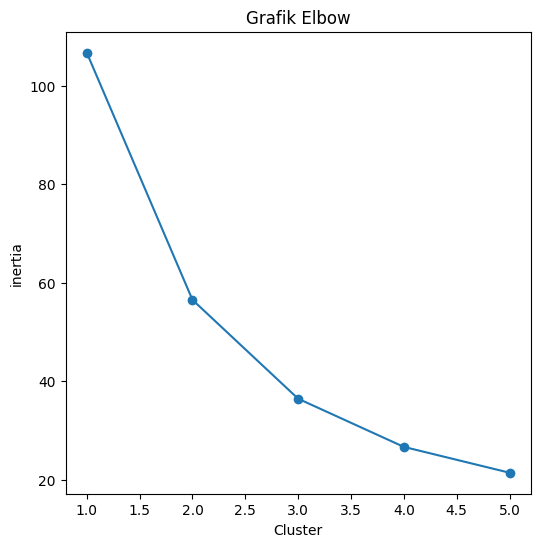

In [28]:
plt.figure(figsize=(6,6))
plt.plot(cluster_range, inertias, '-o')
plt.title("Grafik Elbow")
plt.xlabel("Cluster")
plt.ylabel('inertia')
plt.show()